# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [ ]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
#Set your project path 
project_path =  "/content/drive/My Drive/Great_Lakes_Assignments/13_SQNLP_R10_Project_Sarcasm_Detection"

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [5]:
# Load libraries

import numpy as np
import pandas as pd

%matplotlib inline

In [6]:
sarcasmDF = pd.read_json(project_path+'/Data/Sarcasm_Headlines_Dataset.json',lines=True)
sarcasmDF.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
# check for null values in the dataset (we have no null value)
print(sarcasmDF.isnull().any(axis = 0))

article_link    False
headline        False
is_sarcastic    False
dtype: bool


In [8]:
sarcasmDF.shape

(26709, 3)

In [9]:
# There is no imbalance in the dataset
sarcasmDF.groupby(sarcasmDF["is_sarcastic"]).count()

,article_link,headline
is_sarcastic,,
0,14985,14985
1,11724,11724


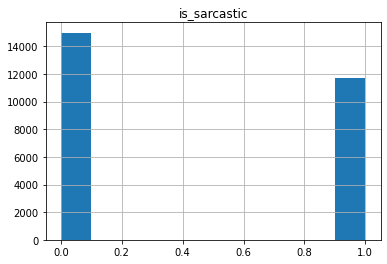

In [10]:
sarcasmDF.hist();

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [11]:
sarcasmDF = sarcasmDF.drop('article_link', axis=1)
sarcasmDF.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [12]:
# Get the Length of each line
sarcasmDF['length'] = sarcasmDF['headline'].apply(lambda x: len(x))
sarcasmDF.head()

,headline,is_sarcastic,length
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


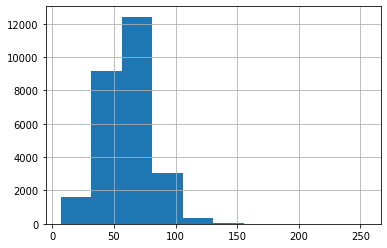

In [13]:
sarcasmDF['length'].hist();

In [14]:
# find the maximum length
max_length = sarcasmDF['length'].max()
max_length

254

In [15]:
# find the minimum length
sarcasmDF['length'].min()

7

#**## Modelling**

## Import required modules required for modelling.

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
print(tf.__version__)

2.3.0


# Set Different Parameters for the model. ( 2 marks)

In [17]:
max_features = 10000
maxlen = sarcasmDF['length'].max() ## Add your max length here ##
embedding_size = 200

print(max_features,maxlen,embedding_size)

10000 254 200


## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [18]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(sarcasmDF['headline'])

# Define X and y for your model.

In [19]:
X = tokenizer.texts_to_sequences(sarcasmDF['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(sarcasmDF['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [20]:
# The real number of words will be
num_words = len(tokenizer.word_index) + 1
num_words

29657

#**## Word Embedding**

## Get Glove Word Embeddings

In [21]:
glove_file = project_path + "glove.6B.zip"

In [ ]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

#All files are alreacdy extracted to the root path folder.

# Get the Word Embeddings using Embedding file as given below.

In [24]:
%cd "/content/drive/My Drive/Great_Lakes_Assignments/13_SQNLP_R10_Project_Sarcasm_Detection"

/content/drive/My Drive/Great_Lakes_Assignments/13_SQNLP_R10_Project_Sarcasm_Detection


In [25]:
EMBEDDING_FILE = './Data/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# Create a weight matrix for words in training docs

In [26]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [27]:
embedding_size = 200

model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5931400   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [30]:
batch_size = 100
epochs = 5

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(21367, 254) (21367,)
(5342, 254) (5342,)


In [31]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs = epochs, batch_size=batch_size, verbose = 2)

Epoch 1/5
214/214 - 365s - loss: 0.4283 - accuracy: 0.7976 - val_loss: 0.3300 - val_accuracy: 0.8560
Epoch 2/5
214/214 - 371s - loss: 0.2489 - accuracy: 0.9011 - val_loss: 0.3099 - val_accuracy: 0.8692
Epoch 3/5
214/214 - 367s - loss: 0.1577 - accuracy: 0.9392 - val_loss: 0.3254 - val_accuracy: 0.8669
Epoch 4/5
214/214 - 369s - loss: 0.0943 - accuracy: 0.9670 - val_loss: 0.4020 - val_accuracy: 0.8647
Epoch 5/5
214/214 - 371s - loss: 0.0555 - accuracy: 0.9797 - val_loss: 0.4865 - val_accuracy: 0.8669


###Training Accuracy - 97.97%
###Validation Accuracy - 86.69%


In [32]:
model.save('sarcasm_detector.h5')

In [33]:
# let see what the percentage of our correct predictions on sarcastic and non-sarcastic look like

from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.rint(Y_pred)
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      3008
           1       0.83      0.87      0.85      2334

    accuracy                           0.87      5342
   macro avg       0.86      0.87      0.87      5342
weighted avg       0.87      0.87      0.87      5342
 



In [34]:
####  TESTING THE MODEL WITH REAL SARCASTIC NEWS #######
# Even though we had nore samples of non_sarcastic news than actual sarcastic news
# The model validation accuracy is good at 86.7% and the classification report
# shows that we equally have a good precision and F-score
# Therefore the model test below on random news text is a true reflection of our model's performance.


twt = ['Police Chief Vows To Take Concrete Steps To Better Cover Up Violence']

#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=maxlen, dtype='int32', value=0)
#print(twt)
sarcasm = model.predict(twt,batch_size=1,verbose = 2)[0]

if(np.rint(sarcasm) == 0):
    print("Not_Sarcastic")
elif (np.rint(sarcasm) == 1):
    print("Sarcastic")

1/1 - 0s
Sarcastic
